# Articial Intelligence and Machine Learning - Coursework 1 - 1st diet
## Modified Chinese-Medicine-163 image dataset


# Introduction to the Chinese Herb Dataset (CNH-98)
The `Chinese Herb Dataset (CNH-98)` is a collection designed to aid in the classification and recognition of `Chinese medicinal herbs` through image-based machine learning models. This dataset includes thousands of images labeled across various classes of Chinese herbs, each corresponding to a particular herb or plant used in traditional Chinese medicine (TCM). The dataset is typically used for training deep learning models, such as Convolutional Neural Networks (CNNs), for image classification tasks, and is especially valuable for botanical researchers, TCM practitioners, and developers working on applications involving medicinal plants.

Problem Definition
The core problem addressed by this dataset is `herb recognition`, where the goal is to classify images of Chinese medicinal herbs into specific categories. The dataset provides labeled images of herbs, which can be used to train algorithms that automatically recognize and categorize these herbs. The challenges associated with this task include variations in image quality, lighting, and size, as well as the fact that some herbs may look similar to each other, making classification more complex.

The task can be viewed as a `multi-class classification` problem, where the goal is to predict the correct herb class from a set of predefined categories. For the specific classes I am working with, the objective is to build a model that can accurately predict which herb is present in a given image.


## Classes in Focus
For the specific task, the dataset includes images of the following 11 herb classes:

- Cordyceps: A type of parasitic fungus used in traditional Chinese medicine, famous for its medicinal properties like boosting energy and enhancing the immune system.
- Cornus Fruit: The fruit of the Cornus plant, often used in TCM for its supposed benefits on the kidneys and digestive system.
- Dried Ginger: A dried form of ginger root, known for its therapeutic uses in digestion, nausea relief, and its warming properties.
- Dried Mulberry: The dried fruit of the mulberry tree, used for its supposed benefits in promoting liver health and improving vision.
- Ginseng: A root known for its tonic effects, widely used in TCM for energy enhancement and to reduce fatigue.
- Hawthorn: The fruit of the hawthorn plant, often used in TCM to aid digestion, reduce cholesterol, and improve cardiovascular health.
- Honeysuckle Flower: The flower of the honeysuckle plant, known in TCM for its antibacterial properties and its use in cooling the body and clearing toxins.
- Lily Bulb: The bulb of the lily plant, used in TCM to treat respiratory issues, clear heat, and nourish the lungs.
- Oyster Shell: A medicinal ingredient derived from oyster shells, often used in TCM for its purported effects in calming the liver and improving calcium levels.
- Schisandra Berry: The berry of the Schisandra plant, known for its adaptogenic properties, helping the body adapt to stress.
- Smoke Plum: A variety of plum used in TCM, believed to have beneficial effects on digestion and the respiratory system.

Each of these herbs has its own distinct physical characteristics, and accurate classification is important for medicinal applications to ensure the proper use of these substances in treatment.

### Module Imports
Before working with the data one needs to import all relevant Python modules. It is good practice to do that in a single Jupyter Notebook cell at the top of your code, rather than spread throughout the whole file.

**TASK**: Modify your conda environment so that the modules below all have been installed. 

In [2]:
# Import necessary libraries
import tensorflow as tf
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# 2. Data loading and preparation

### About Dataset
The dataset is labelled   `ChineseHerbs` and it contains over different 11 different types of herbs. Each Different type of herb collection of images contains over 1500 images. This dataset can be put to training to achieve a Convolutional Neural Network (CNN), a Classifier that can classify among these 11 different herbs.

## Dataset loading
Dataset needs to be divided in 3 chunks before loading it into system.

The standard practice to divide the dataset is 70% for training 30% for testing. The validation set is 20% of training set images. So the division is as follow.

1. `Training Dataset` is 70% of which 20% belongs to `Validation Dataset`
2. `Testing Dataset` is 20% of the original dataset

## Dataset Preparation


### Labelling :
 For supervised learning (which CNNs typically use for classification tasks), the dataset must be correctly labeled. This means each image in the dataset needs to have a clear, consistent label indicating its category (e.g., “dried_ginger,” ginseng,” “cordyceps”). These labels are used during training for the CNN to learn to associate patterns in the image with specific classes.

### Data Augmentation

Data Augmentation is a technique used in machine learning, particularly in deep learning, to artificially increase the size and diversity of a dataset by generating modified versions of existing data. For image data, this means creating variations of images by applying transformations like rotation, scaling, flipping, and more. Data augmentation is especially useful in training `Convolutional Neural Networks (CNNs)` to improve model generalization and prevent `overfitting` when the amount of labeled data is limited

In [3]:
# Path to your dataset directory (modify as necessary)
base_dir = './ChineseHerbs'
base_dir

'./ChineseHerbs'

In [4]:
# List the categories of herbs
categories = os.listdir(base_dir)
print(f"Total categories: {len(categories)}")

print("Categories:", categories)

Total categories: 11
Categories: ['cordyceps', 'cornus_fruit', 'dried_ginger', 'dried_mulberry', 'ginseng', 'hawthorn', 'honeysuckle_flower', 'lily_bulb', 'oyster_shell', 'schisandra_berry', 'smoke_plum']


In [5]:
# Count number of images per category
category_counts = {}
for category in categories:
    category_path = os.path.join(base_dir, category)
    category_counts[category] = len(os.listdir(category_path))

for category, count in category_counts.items():
    print(f"{category}: {count} images")

cordyceps: 1564 images
cornus_fruit: 1562 images
dried_ginger: 1566 images
dried_mulberry: 1566 images
ginseng: 1741 images
hawthorn: 1559 images
honeysuckle_flower: 1554 images
lily_bulb: 1565 images
oyster_shell: 1564 images
schisandra_berry: 1568 images
smoke_plum: 1557 images


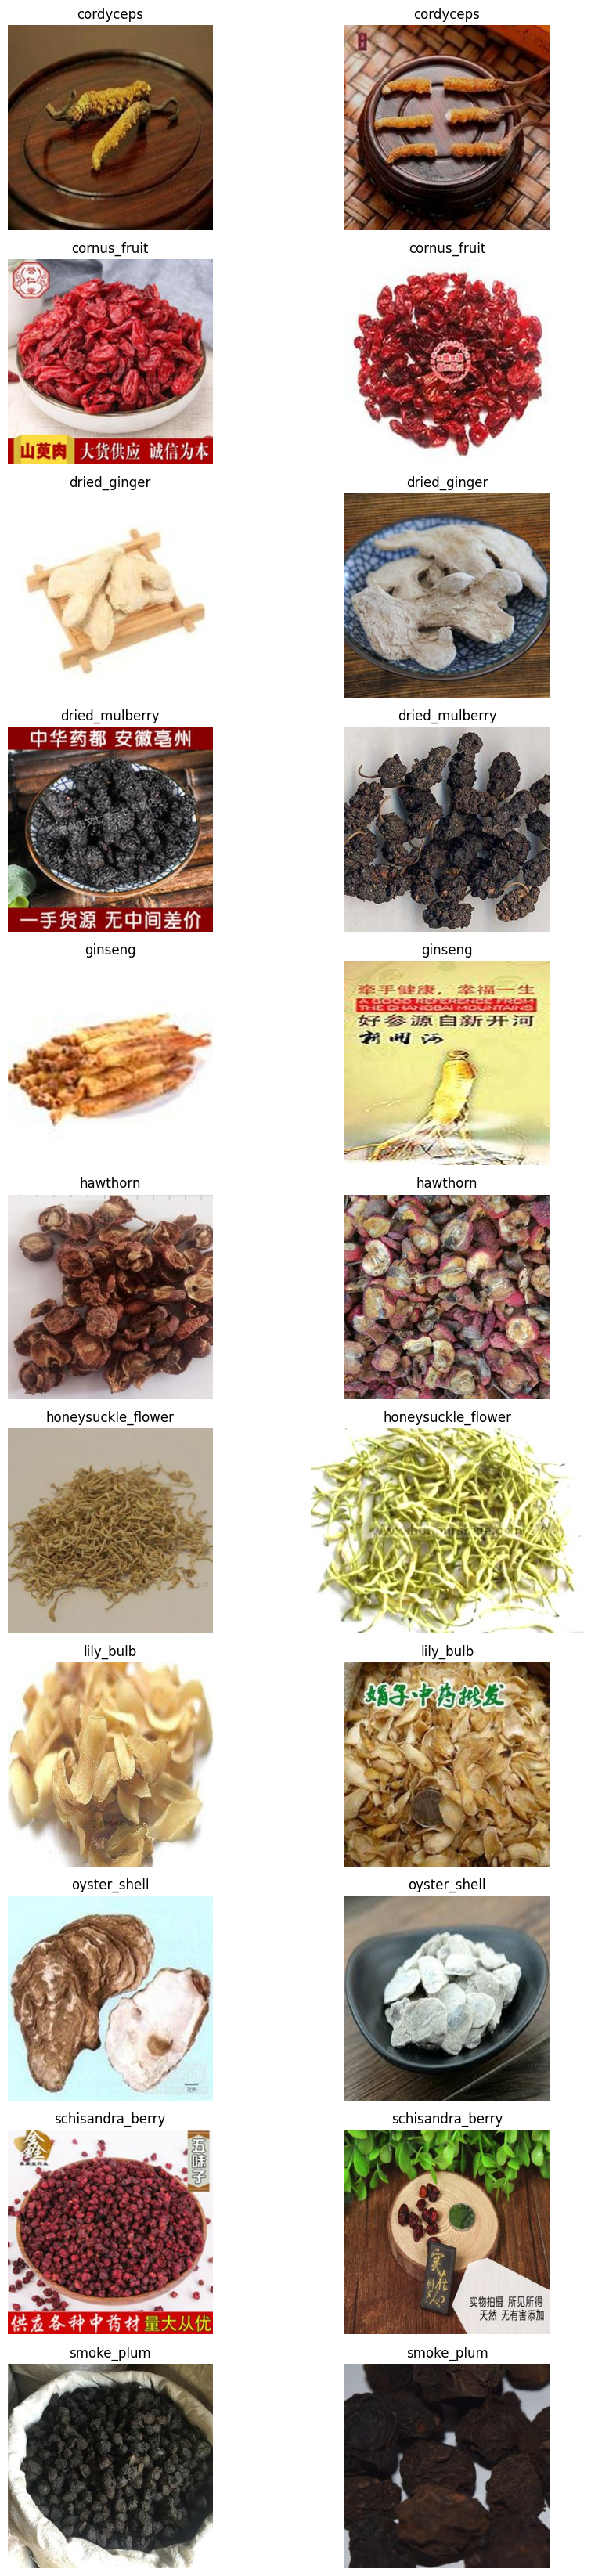

In [6]:
# Displaying sample images from each category
def display_sample_images(base_dir, categories):
    fig, axes = plt.subplots(len(categories), 2, figsize=(10, len(categories) * 3))
    for i, category in enumerate(categories):
        category_path = os.path.join(base_dir, category)
        sample_images = os.listdir(category_path)[:2]
        for j, img_name in enumerate(sample_images):
            img_path = os.path.join(category_path, img_name)
            img = plt.imread(img_path)
            axes[i, j].imshow(img)
            axes[i, j].set_title(category)
            axes[i, j].axis("off")
        #     break
        # break
    plt.tight_layout()
    plt.show()

display_sample_images(base_dir, categories)

# Preparing data for Training

As I mentioned earlier that Dataset needs to be organized in a manner of 70-30 Ration for training and testing. Below Code will make changes to current dataset to change their order as

- class
  - train
  - validate
  - test

This will help in achieving loading dataset from built-in method of ImageDataGenerator Class `flow_from_directory` that will load images and apply all the configurations provided.



In [7]:
new_dataset = 'dataset'
classes = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
def move_files(image_list, source_dir, target_dir):
    for image_name in image_list:
        source = os.path.join(source_dir, image_name)
        destination = os.path.join(target_dir, class_name, image_name)
        shutil.copy(source, destination)
    
# Paths for new splits
train_dir = os.path.join(new_dataset, 'train')
validate_dir = os.path.join(new_dataset, 'validate')
test_dir = os.path.join(new_dataset, 'test')
train_dir, validate_dir, test_dir

for split_dir in [train_dir, validate_dir, test_dir]:
    os.makedirs(split_dir, exist_ok=True)
    for class_name in classes:
        os.makedirs(os.path.join(split_dir, class_name), exist_ok=True)
total_train_images = 0
total_validate_images = 0
total_test_images = 0
for class_name in classes:
    # List all images in the current class directory
    class_dir = os.path.join(base_dir, class_name)
    images = [img for img in os.listdir(class_dir) if img.endswith(('.jpg', '.jpeg', '.png'))]
    train_images, test_images = train_test_split(images, test_size=0.3, random_state=42)
    # Further split train set into train and validate (80% train, 20% validate)
    train_images, validate_images = train_test_split(train_images, test_size=0.2, random_state=42)
    total_train_images += len(train_images)
    total_validate_images += len(validate_images)
    total_test_images += len(test_images)
    move_files(train_images, class_dir, train_dir)
    move_files(validate_images, class_dir, validate_dir)
    move_files(test_images, class_dir, test_dir)
    # break
# class_dir,

print(f'total train images: {total_train_images} validate images: {total_validate_images} test images: {total_test_images}')
'Dataset split complete',train_dir, validate_dir, test_dir

total train images: 9715 validate images: 2435 test images: 5216


('Dataset split complete',
 'dataset\\train',
 'dataset\\validate',
 'dataset\\test')

# Preparing Dataset for CNN via ImageDataGenerator

Keras provides ImageDataGenerator that is riched with options to load dataset and configure it according to classifying problem.

It provides DataGenerators which are used to perform Data Augmentation on images such as zoom, flip, sheer range, brightness and more along with labelling by reading images from directory. It is crucial to understand how `flow_from_directory` label data set, here is the quick expalanation. 

Since our dataset is organized as

- train 
  - class_a
  - class_b

The flow that will be generated form train folder will label all images within class_a directory as `class_a`  and so on for other classes.The method ease the training for system with limited Ram and it is a preferred method of loading images, preprocessing rather than old method of old loading set in Ram by using OpenCV or other methods.

#### flow_from_directory 
`flow from direcotry`in `Keras` does not load all images at once into RAM. Instead, it loads images in batches based on the specified batch_size parameter. This makes it memory-efficient and ideal for handling large datasets that wouldn’t fit into memory if loaded all at once

# Training Parameters

Training Parameters are crucial in making the dataset best fit for training. 

The standard input of CNN model is `224x224(x3)` where x3 represents RGB. The selected Image size shows significant on model efficiency, bigger image size can lead to bigger training time while `150x150x3` size is good fit for faster model training.

It is important to specify the Classification problem to data generator such as `Binary` or `Categorical`. In our cases, we have `Categorical` mode set in our data generators

Other parameters in DataGenerators are like recale, widht_shift, zoom_range etc. Further information is given as comments while initializing data generators.



In [8]:
BATCH_SIZE = 16
IMG_SHAPE = (150, 150)
import cv2

def rgb_to_hsv(img):
    # OpenCV uses BGR by default, but we assume img is in RGB format
    img_rgb = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR first (as OpenCV uses BGR)
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2HSV)  # Convert BGR to HSV
    return img_hsv
train_datagen = ImageDataGenerator(
    # preprocessing_function=rgb_to_hsv,  # Use the RGB to HSV function
    rescale=1.0/255,           # Normalize pixel values to [0,1]
    # rotation_range=40,          # Randomly rotate images
    # # width_shift_range=0.2,      # Randomly shift images horizontally
    # # height_shift_range=0.2,     # Randomly shift images vertically
    # shear_range=0.2,            # Shear transformation
    # zoom_range=0.2,             # Randomly zoom into images
    # horizontal_flip=True,       # Randomly flip images horizontally
    # fill_mode='nearest'         # Fill in pixels with nearest values
)

# Create an ImageDataGenerator for validation (no augmentation, only rescaling)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Create an ImageDataGenerator for test data (no augmentation, only rescaling)
test_datagen = ImageDataGenerator(rescale=1.0/255)

print('\n\nTraining data generator:')
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SHAPE,      # Resize all images to this size
    batch_size=BATCH_SIZE,               # Number of images in each batch
    class_mode='categorical'          # Use 'binary' for binary classification
)
print('\n\nValidation data generator:')
validation_generator = validation_datagen.flow_from_directory(
    validate_dir,
    target_size=IMG_SHAPE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
print('\n\nTest data generator:')
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SHAPE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False               # Do not shuffle test data
)
'Data generators created'



Training data generator:
Found 9715 images belonging to 11 classes.


Validation data generator:
Found 2435 images belonging to 11 classes.


Test data generator:
Found 5216 images belonging to 11 classes.


'Data generators created'

# TASK 1: Develop a Baseline CNN Model
This is a baseline Convolutional Neural Network (CNN) model designed for multi-class image classification tasks. The architecture and functionality of the model are described below:
## Model Architecture

- Input Shape: The model accepts input images with a shape defined by IMG_SHAPE.
- Convolutional Blocks:
- The model consists of three convolutional blocks. Each block includes a convolutional layer followed by a max-pooling layer:
- - Block 1: 32 filters with a kernel size of 3x3 and ReLU activation.
- - Block 2: 64 filters with a kernel size of 3x3 and ReLU activation.
- - Block 3: 128 filters with a kernel size of 3x3 and ReLU activation.
- Max-pooling with a pool size of 2x2 is applied after each convolutional layer to reduce spatial dimensions and retain key features.
- - Flatten Layer:

#### After the convolutional blocks, the output feature maps are flattened into a 1D vector to connect with the dense layers.

- Fully Connected Dense Layers:
- - The first dense layer contains 128 units with ReLU activation.
- - A dropout layer with a rate of 50% is included for regularization, reducing overfitting.
- - The second dense layer contains 64 units with ReLU activation.
- - The output layer contains NUM_CLASSES units with softmax activation for multi-class classification.

## 3. Define a basic CNN model

The model that is being deployed is a Sequential model for multi class classification

In [9]:
IMG_SHAPE = (150, 150, 3)  # Input image dimensions
NUM_CLASSES = 11           # Number of herb categories
LEARNING_RATE = 0.001      # Learning rate for the optimizer

# Build the CNN model
def classify_models(LR = LEARNING_RATE):
    model = Sequential()

    # Convolutional Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=IMG_SHAPE))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Block 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Block 3
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten layer
    model.add(Flatten())

    # Fully connected Dense layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(64, activation='relu'))
    model.add(Dense(NUM_CLASSES, activation='softmax'))  # Output layer with softmax for multi-class classification

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',  # For multi-class classification
                  metrics=['accuracy'])
    
    return model
model = classify_models()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [11]:
len(train_generator), len(validation_generator), total_train_images , total_validate_images

(608, 153, 9715, 2435)

In [12]:
history = model.fit(
    train_generator, 
    steps_per_epoch=len(train_generator),# len(train_generator) // BATCH_SIZE,  # total samples // batch size
    epochs=10, 
    validation_data=validation_generator, 
    validation_steps= len(validation_generator)#len(validation_generator)//BATCH_SIZE   # total samples // batch size
)


Epoch 1/10
608/608 [==============================] - 68s 109ms/step - loss: 2.0343 - accuracy: 0.2246 - val_loss: 1.3324 - val_accuracy: 0.4850
Epoch 2/10
608/608 [==============================] - 16s 26ms/step - loss: 1.4207 - accuracy: 0.4497 - val_loss: 1.1607 - val_accuracy: 0.5429
Epoch 3/10
608/608 [==============================] - 15s 24ms/step - loss: 1.2178 - accuracy: 0.5350 - val_loss: 0.9948 - val_accuracy: 0.6205
Epoch 4/10
608/608 [==============================] - 15s 25ms/step - loss: 1.0767 - accuracy: 0.5989 - val_loss: 0.8446 - val_accuracy: 0.6903
Epoch 5/10
608/608 [==============================] - 15s 24ms/step - loss: 0.8997 - accuracy: 0.6566 - val_loss: 0.7565 - val_accuracy: 0.7314
Epoch 6/10
608/608 [==============================] - 15s 25ms/step - loss: 0.7375 - accuracy: 0.7235 - val_loss: 0.6752 - val_accuracy: 0.7618
Epoch 7/10
608/608 [==============================] - 15s 24ms/step - loss: 0.6041 - accuracy: 0.7722 - val_loss: 0.6587 - val_accuracy

# 4. Model evaluation

- Batch Size : `16`
- Epochs: `10`
- Training Samples & Steps per Epoch: `608`
- Validation Samples & Validation Steps: `153`
- Training Accuracy on Last Epoch: `0.86` or `86.41%`
- Validation Accuracy on Last Epoch: `0.8522` or `85.22%`

#### Training, Validation and Testing
`Training Accuracy` is defined as the accurate prediction by the model while learning new `features` and `Validation` is determined on how well the trained model performs on a separate validation dataset after each epoch. This dataset is not used for learning and validation helps in tune the model and A high validation accuracy indicates better generalization, while a significant gap between training and validation accuracy can suggest `overfitting`.



`Testing` accuracy is determined by calculating the model performance by testing it on `Unseen` data.

In [13]:
from sklearn.metrics import classification_report

# Get predictions
predictions = model.predict(test_generator)
predicted_classes = predictions.argmax(axis=1)  # Convert probabilities to class indices
true_classes = test_generator.classes  # True class indices
class_labels = list(test_generator.class_indices.keys())  # Class names

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


                    precision    recall  f1-score   support

         cordyceps       0.84      0.76      0.80       470
      cornus_fruit       0.89      0.92      0.90       469
      dried_ginger       0.76      0.81      0.78       470
    dried_mulberry       0.80      0.80      0.80       470
           ginseng       0.73      0.75      0.74       523
          hawthorn       0.91      0.95      0.93       468
honeysuckle_flower       0.95      0.92      0.94       467
         lily_bulb       0.87      0.80      0.83       470
      oyster_shell       0.81      0.85      0.83       470
  schisandra_berry       0.82      0.77      0.80       471
        smoke_plum       0.79      0.82      0.81       468

          accuracy                           0.83      5216
         macro avg       0.83      0.83      0.83      5216
      weighted avg       0.83      0.83      0.83      5216



# What are Precision, Recall, F1-Score and Support?
- Precision : How many of the predicted positives were correct?	
- Recall : How many of the actual positives were identified?	
- F1-Score	Balance of precision and recall
- Support	Count of true positive samples

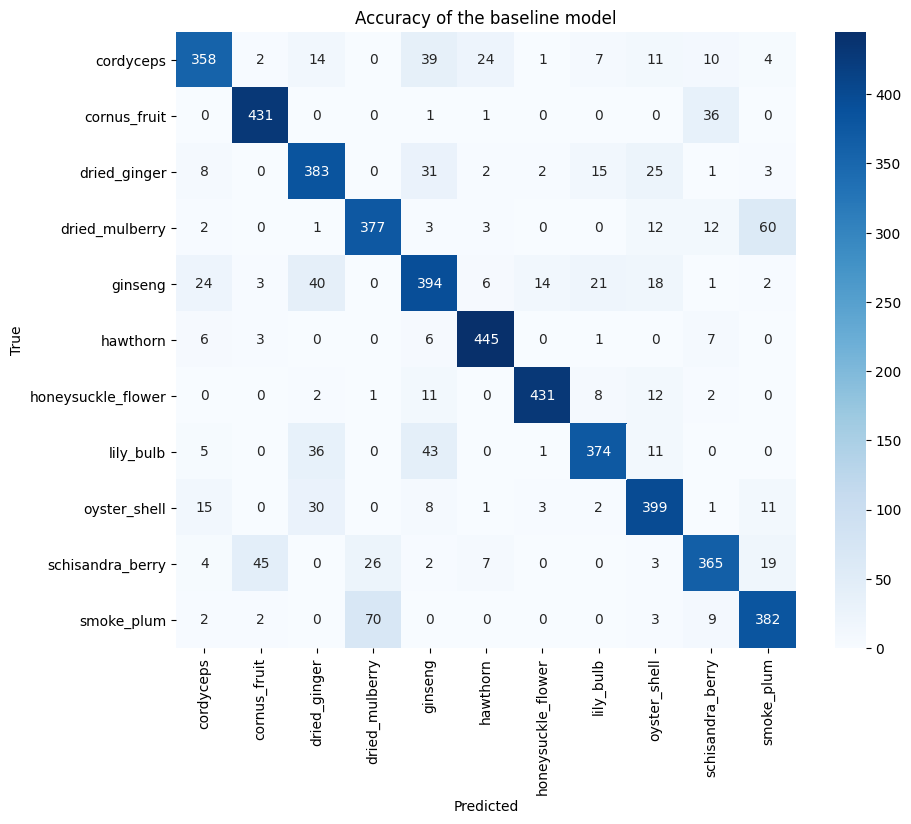

In [16]:
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Accuracy of the baseline model')
plt.show()

# TASK 2: Enhance Model Performance

Followings are the Parameters of Image Data Generators are modified to enhance Model Performance.
1. `Brightness range` let the image datagenerator to randomly adjust the brightness of the image
2. `Rotation Range` rotates the image randomly
3. `Width Shift Range` Randomly shifts images horizontally
4. `Height Shift Range` Randomly shifts the images vertically
5. `Shear Range` performs Shear Transformation on the image
6. `Zoom Range` performs zoom into an Image
7. `Horizontal` and `Vertical Flip` the image respectively.
8. `Fill Mode` settings determines to fill the pixel with appropriate value. In my case, it is `nearest`

These parameters are doing data augmentation on train dataset and diverse the learning opportunity.

#### Hyper-Parameters
- Batch Size : `32`
- Epochs: `40`
- New Changes in CNN Architecture : `Block 3` contains `128` Neurons with 3, 3 kernel window size to detect small features
- Added `Dropout` for `Regularization`  



## 5. Enhance the baseline model

In [29]:
BATCH_SIZE = 32
IMG_SHAPE = (150, 150)
train_datagen = ImageDataGenerator(
    # preprocessing_function=rgb_to_hsv,  # Use the RGB to HSV function
    rescale=1.0/255,           # Normalize pixel values to [0,1]
    brightness_range=[0.2, 0.6],  # Randomly adjust brightness
    # rotation_range=40,          # Randomly rotate images
    # width_shift_range=0.2,      # Randomly shift images horizontally
    # height_shift_range=0.2,     # Randomly shift images vertically
    shear_range=0.2,            # Shear transformation
    # zoom_range=0.2,             # Randomly zoom into images
    # horizontal_flip=True,       # Randomly flip images horizontally
    # vertical_flip=True,         # Randomly flip images vertically
    fill_mode='nearest'         # Fill in pixels with nearest values
)

# Create an ImageDataGenerator for validation (no augmentation, only rescaling)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Create an ImageDataGenerator for test data (no augmentation, only rescaling)
test_datagen = ImageDataGenerator(rescale=1.0/255)

print('\n\nTraining data generator:')
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SHAPE,      # Resize all images to this size
    batch_size=BATCH_SIZE,               # Number of images in each batch
    class_mode='categorical'          # Use 'binary' for binary classification
)
print('\n\nValidation data generator:')
validation_generator = validation_datagen.flow_from_directory(
    validate_dir,
    target_size=IMG_SHAPE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
print('\n\nTest data generator:')
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SHAPE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False               # Do not shuffle test data
)
f'Data Generators created for Enhance Parameters : with {BATCH_SIZE} batch size - {IMG_SHAPE} image shape'



Training data generator:
Found 9715 images belonging to 11 classes.


Validation data generator:
Found 2435 images belonging to 11 classes.


Test data generator:
Found 5216 images belonging to 11 classes.


'Data Generators created for Enhance Parameters : with 32 batch size - (150, 150) image shape'

In [30]:
def classify_models_v2(LR = LEARNING_RATE,IMG_SHAPE = (150, 150, 3),NUM_CLASSES = 11):
    model = Sequential()

    # Convolutional Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=IMG_SHAPE))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Block 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #new Convolutional Block 3
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(0.3)) # Dropout for regularization

    # Convolutional Block 4
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(0.2)) # Dropout for regularization

    # Flatten layer
    model.add(Flatten())

    # Fully connected Dense layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(64, activation='relu'))
    model.add(Dense(NUM_CLASSES, activation='softmax'))  # Output layer with softmax for multi-class classification

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=LR),
                  loss='categorical_crossentropy',  # For multi-class classification
                  metrics=['accuracy'])
    
    return model
enhanced_model = classify_models_v2()
enhanced_model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 128)      

In [31]:
history_v1 = enhanced_model.fit(
    train_generator, 
    steps_per_epoch=len(train_generator),# len(train_generator) // BATCH_SIZE,  # total samples // batch size
    epochs=40, 
    validation_data=validation_generator, 
    validation_steps= len(validation_generator)#len(validation_generator)//BATCH_SIZE   # total samples // batch size
)

Epoch 1/40
304/304 [==============================] - 96s 314ms/step - loss: 2.2412 - accuracy: 0.1521 - val_loss: 1.7899 - val_accuracy: 0.3745
Epoch 2/40
304/304 [==============================] - 93s 307ms/step - loss: 1.6530 - accuracy: 0.3719 - val_loss: 1.3591 - val_accuracy: 0.4793
Epoch 3/40
304/304 [==============================] - 97s 318ms/step - loss: 1.3947 - accuracy: 0.4449 - val_loss: 1.4779 - val_accuracy: 0.4493
Epoch 4/40
304/304 [==============================] - 95s 312ms/step - loss: 1.2913 - accuracy: 0.4908 - val_loss: 1.1546 - val_accuracy: 0.5655
Epoch 5/40
304/304 [==============================] - 95s 313ms/step - loss: 1.1210 - accuracy: 0.5601 - val_loss: 1.0625 - val_accuracy: 0.5967
Epoch 6/40
304/304 [==============================] - 97s 319ms/step - loss: 1.0485 - accuracy: 0.5905 - val_loss: 0.9235 - val_accuracy: 0.6460
Epoch 7/40
304/304 [==============================] - 98s 323ms/step - loss: 0.9337 - accuracy: 0.6419 - val_loss: 1.1243 - val_ac

## 6. Model evaluation
- Training and Steps per Epoch: `304`
- Validation Samples & Validation Steps: `77`
- Training Accuracy on Last Epoch: `0.9598` or `95.98%`
- Validation Accuracy on Last Epoch: `0.8497` or `84.97%`

In [32]:
predictions = enhanced_model.predict(test_generator)
predicted_classes = predictions.argmax(axis=1)  # Convert probabilities to class indices
true_classes = test_generator.classes  # True class indices
class_labels = list(test_generator.class_indices.keys())  # Class names

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

                    precision    recall  f1-score   support

         cordyceps       0.81      0.82      0.81       470
      cornus_fruit       0.93      0.91      0.92       469
      dried_ginger       0.82      0.75      0.78       470
    dried_mulberry       0.78      0.82      0.80       470
           ginseng       0.68      0.82      0.74       523
          hawthorn       0.98      0.90      0.94       468
honeysuckle_flower       0.89      0.97      0.93       467
         lily_bulb       0.90      0.76      0.83       470
      oyster_shell       0.82      0.83      0.83       470
  schisandra_berry       0.85      0.85      0.85       471
        smoke_plum       0.84      0.79      0.81       468

          accuracy                           0.84      5216
         macro avg       0.84      0.84      0.84      5216
      weighted avg       0.84      0.84      0.84      5216



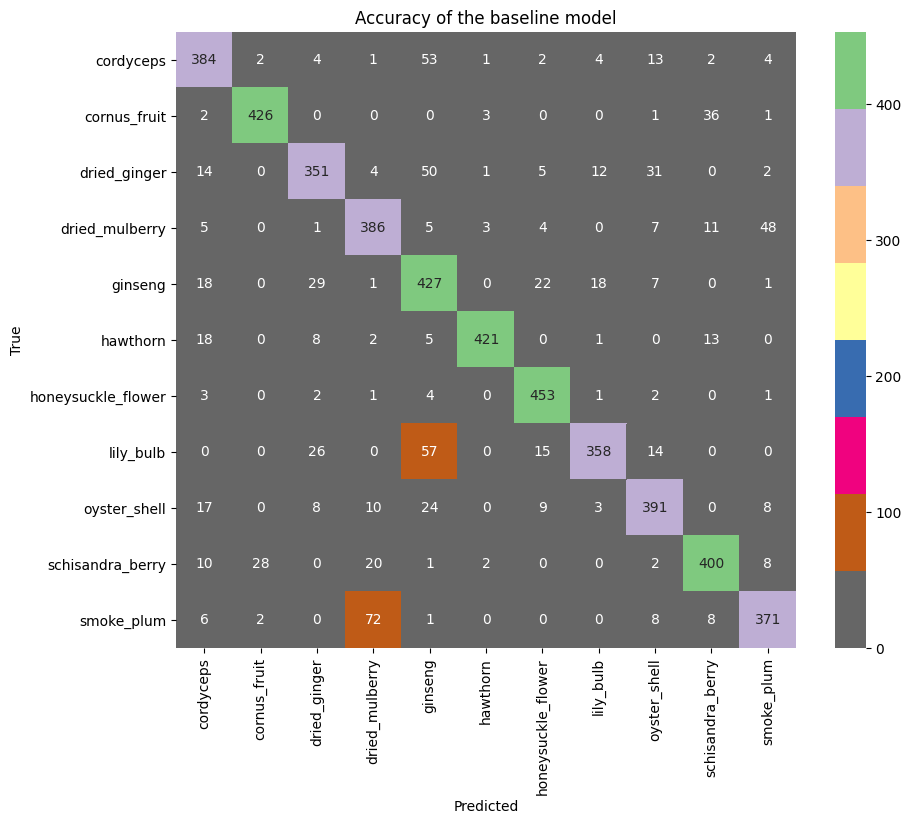

In [34]:
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Accent_r')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Accuracy of the baseline model')
plt.show()

# 7. Discussion and conclusion


## Convolutional Neural Network(s)
#### The baseline CNN model consist of following layers:
- `Input Layer`, 32 Filters, (3, 3) Kernel size, Activation: `relu`, ImageShape: (150,150,3)
- - `150 x 150` represents `Width` x `Height` while 3 represents `color channel`
- - `relu` helps avoid the vanishing gradient problem and speeds up training by only passing positive values
- - `(3, 3)` Kernel Window is commonly used for detecting small features
- `Hidden Layers` composed of 2 with 64, 128 with Max pooling size of (2, 2) 
- - Max Pooling Size helps in keeping the important information. (2, 2) size means a matrix of 2,2 filters applied to CNN layers' result
- `Dense Layers` are added in to CNN to learn complex details during training
- - It consist two Dense layer with 128 Neurons, `relu` as an activation, and `Drop out` of 50% to introduce the `Regularization` 
- - `Ouput layer` is also a Dense Layer and it contains neurons equal to total number of `Classes` with `softmax` as an activation function.
- - `softmax` activation picks the or outputs the neuron with most score. 
#### Changes to Enhance the Model
-  New `Hidden Layer` contains 128 neurons with (3, 3), activation to `relu`, and max pooling to (2, 2)

## Results

1. Baseline Model Convoluional Neural Network
- Training Accuracy: 86.41%
- Validation Accuracy: 85.22%
- Testing Accuracy: 84%

The base line model is compact and faster to train on CUDA enabled machine with good accuracy to training time ratio. The training was completed in under 4 mins while achieving 80%+ accuracy in the last epoch and promising accuracy in testing of 84%. The model does not show the signs of over-fitting as the accuracies are closely packed showing that model did learn significant features during training.

2. Enhanced Model
- Training Accuracy: 95.98%
- Validation Accuracy: 84.97%
- Testing Accuracy: 81%

While the enhanced model achieves higher training accuracy, the noticeable gap between training and validation/testing performance highlights overfitting issues. It may require further optimization, such as:
- Reducing model complexity.
- Applying stronger regularization (e.g., dropout, L2 regularization).
- Collecting additional diverse data.
The model training drastically increased with complex architecture to 88 minutes while base line model with faster training time of 4 mins. 
3. Recommendation:

For practical applications, the baseline model is preferred due to its simplicity, fast training, and consistent accuracy across all datasets.
The enhanced model could serve as a foundation for further experimentation if the goal is to maximize accuracy and computational resources are not a constraint.

4. Future Work:
Investigate the effectiveness of additional data augmentation techniques.
Explore ensemble approaches that combine both models to potentially leverage the strengths of each.
Analyze misclassifications in testing to identify classes where improvements are needed.
#### Conclusion:  

The baseline model demonstrates robust performance with consistent training, validation, and testing accuracies, making it an ideal choice for practical deployment due to its simplicity, efficiency, and ability to generalize well. On the other hand, the enhanced model, while achieving higher training accuracy, exhibits signs of overfitting and reduced generalization ability as reflected in lower validation and testing accuracies. This highlights the need for further optimization to improve its real-world applicability. Based on the analysis, the baseline model is recommended for balanced accuracy and efficiency, while the enhanced model could be further refined to achieve superior performance in controlled scenarios.


--- 



Sources:

- How to calculate Precision, Recall, F1-Score, and Support :  https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/
- VGG 16 : https://www.geeksforgeeks.org/vgg-16-cnn-model/
- Classification Report : https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html
- Deep Learning Concepts : https://link.springer.com/article/10.1186/s40537-021-00444-8
- ImageDataGenerator: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
- Image Augumentation : https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/
- How to Identify Over Fitting in Machine Learning: https://machinelearningmastery.com/overfitting-machine-learning-models/


